In [22]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('script')

In [3]:
from script import dbconn

In [17]:
pgconn = dbconn.db_connection_psycopg()
print(pgconn)

<connection object at 0x7fd0860ad400; dsn: 'user=postgres password=xxx dbname=telecom host=localhost port=5432', closed: 0>


In [18]:
df_telecom = dbconn.db_read_table_psycopg(pgconn, 'xdr_data')
df_telecom.head(2)

/home/lillian/Documents/TenAcadamyTasks/Databases/script/dbconn.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, pgconn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [19]:
df_telecom.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [39]:
engine_conn = dbconn.db_connection_sqlalchemy()

In [40]:
df1 = dbconn.db_read_table_sqlalchemy(engine_conn, 'xdr_data')
print(df1)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [12]:
df_clean = df1[['Bearer Id', 'Start']]

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Bearer Id  149010 non-null  float64
 1   Start      150000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [16]:
df1.to_sql('clean_data', engine_conn)

170

In [20]:
df_clean.describe()

,Bearer Id
count,1.490100e+05
mean,1.013887e+19
std,2.893173e+18
min,6.917538e+18
25%,7.349883e+18
50%,7.349883e+18
75%,1.304243e+19
max,1.318654e+19


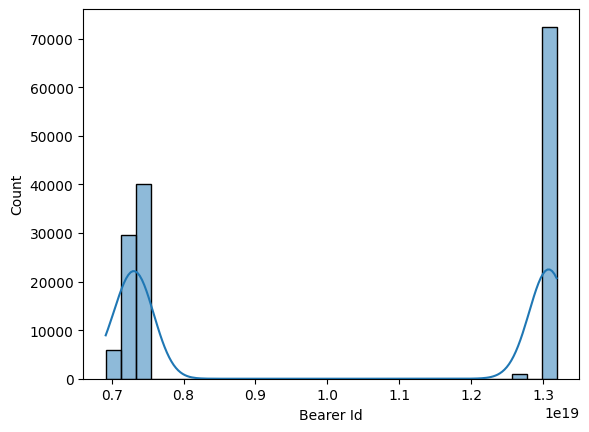

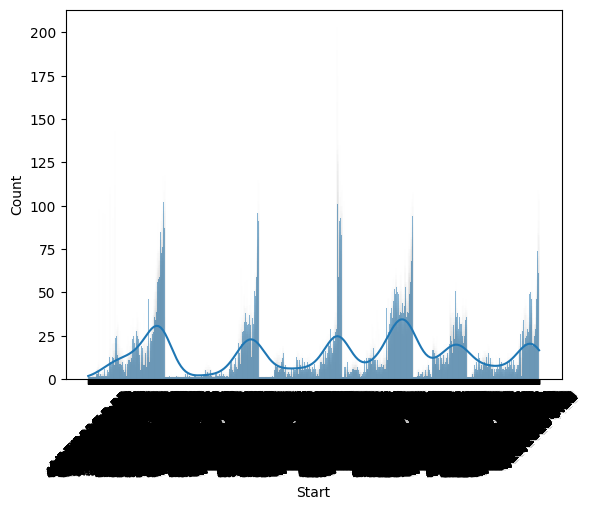

In [23]:
sns.histplot(df_clean['Bearer Id'], bins=30, kde=True)
plt.show()

# Distribution of Start times
sns.histplot(df_clean['Start'], bins=30, kde=True)
plt.xticks(rotation=45)
plt.show()

In [24]:
df_clean.isnull().sum()

Bearer Id    991
Start          1
dtype: int64

In [26]:
top_handsets = df_telecom['Handset Type'].value_counts().head(10)
print("The top 10 handsets used by customers:")
print(top_handsets)

The top 10 handsets used by customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [29]:
top_manufacturers = df_telecom['Handset Manufacturer'].value_counts().head(3)
print("The top 3 HandSet Manufacturers are:")
print(top_manufacturers)

The top 3 HandSet Manufacturers are:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [34]:
top_manufacturer_names = top_manufacturers.index

top_manufactuerer_df = df_telecom[df_telecom['Handset Manufacturer'].isin(top_manufacturer_names)]

top_handsets_per_manufacturer = top_manufactuerer_df.groupby(['Handset Manufacturer', 'Handset Type']).size().groupby('Handset Manufacturer').nlargest(5)

print("Top 5 handsets per top 3 handset manufactureres:")
print(top_handsets_per_manufacturer)

Top 5 handsets per top 3 handset manufactureres:
Handset Manufacturer  Handset Manufacturer  Handset Type                  
Apple                 Apple                 Apple iPhone 6S (A1688)            9419
                                            Apple iPhone 6 (A1586)             9023
                                            Apple iPhone 7 (A1778)             6326
                                            Apple iPhone Se (A1723)            5187
                                            Apple iPhone 8 (A1905)             4993
Huawei                Huawei                Huawei B528S-23A                  19752
                                            Huawei E5180                       2079
                                            Huawei P20 Lite Huawei Nova 3E     2021
                                            Huawei P20                         1480
                                            Huawei Y6 2018                      997
Samsung               Samsung       

In [35]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
user_aggregation = pd.DataFrame()
grouped_by_user = df_telecom.groupby('MSISDN/Number')
for app in applications:
    # Count the number of xDR sessions
    user_aggregation[f'{app}_Sessions'] = grouped_by_user['Bearer Id'].count()
    
    # Sum the session duration
    user_aggregation[f'{app}_Session_Duration'] = grouped_by_user['Dur. (ms)'].sum()
    
    # Sum the total download (DL) and upload (UL) data
    user_aggregation[f'{app}_Total_DL'] = grouped_by_user[f'{app} DL (Bytes)'].sum()
    user_aggregation[f'{app}_Total_UL'] = grouped_by_user[f'{app} UL (Bytes)'].sum()

    # Sum the total data volume (in Bytes) during this session for each application
    user_aggregation[f'{app}_Total_Volume'] = user_aggregation[f'{app}_Total_DL'] + user_aggregation[f'{app}_Total_UL']

# Reset the index to have 'MSISDN/Number' as a regular column
user_aggregation.reset_index(inplace=True)

# Display the aggregated information
print(user_aggregation)

        MSISDN/Number  Social Media_Sessions  Social Media_Session_Duration  \
0        3.360100e+10                      1                       116720.0   
1        3.360100e+10                      1                       181230.0   
2        3.360100e+10                      1                       134969.0   
3        3.360101e+10                      1                        49878.0   
4        3.360101e+10                      2                        37104.0   
...               ...                    ...                            ...   
106851   3.379000e+10                      1                         8810.0   
106852   3.379000e+10                      1                       140988.0   
106853   3.197021e+12                      1                       877385.0   
106854   3.370000e+14                      1                       253030.0   
106855   8.823971e+14                      1                       869844.0   

        Social Media_Total_DL  Social Media_Total_U